# Outlines
import data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
import math
import os

In [2]:
path='data.csv'
df_data = pd.read_csv(path)
df_data.head()

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100


In [3]:
df_data.isna().any()

ticker    False
date      False
last      False
volume    False
dtype: bool

In [4]:
companyList=list(df_data['ticker'])
companySet=list(dict.fromkeys(companyList))
companyNum=len(companySet)
companyNum

248

In [5]:
date=pd.to_datetime(df_data['date'].drop_duplicates())
datenum=len(date)
datenum

2005

In [6]:
df_data.loc[:,'pd_date']=pd.to_datetime(df_data['date'])
df_data.loc[:,'year']=df_data['pd_date'].dt.year
i=0
df_temp=df_data[df_data['ticker']==companySet[i]]
df_temp['year'].value_counts(sort=False)

2013    245
2014    244
2015    244
2016    245
2017    247
2018    245
2019    241
2020    242
2021     52
Name: year, dtype: int64

In [7]:
## using the changing rate of last as label
df_data.loc[:,'label']=df_data.groupby('ticker')['last'].pct_change(1)

# Single alpha test
There are two alphas for single alpha test.

In [8]:
## alpha 1: the difference between 5 days average vwap and last
# large alpha corresponds to long
df_data.loc[:,'value']=df_data['last']*df_data['volume']
df_data.loc[:,'cum_value'] = df_data.groupby('ticker')['value'].rolling(5).sum().values
df_data.loc[:,'cum_volume'] = df_data.groupby('ticker')['volume'].rolling(5).sum().values
df_data['vwap_5D']=df_data['cum_value'] / df_data['cum_volume']
df_data['factor_vwap']=(df_data['vwap_5D']-df_data['last']) / df_data['vwap_5D']

In [9]:
## alpha 2: 5 days return rate of last
# large alpha corresponds to short
df_data.loc[:,'factor_return5D']=df_data.groupby('ticker')['last'].pct_change(5)

In [10]:
df_data=df_data.dropna()
df_data

,ticker,date,last,volume,pd_date,year,label,value,cum_value,cum_volume,vwap_5D,factor_vwap,factor_return5D
5,1332 JT,2013-01-11,170.9468,2864200,2013-01-11,2013,0.022099,4.896258e+08,1.457362e+09,8678400.0,167.929746,-0.017966,0.010929
6,1332 JT,2013-01-15,174.6430,2407400,2013-01-15,2013,0.021622,4.204356e+08,1.581154e+09,9302300.0,169.974477,-0.027466,0.050000
7,1332 JT,2013-01-16,169.0987,3636700,2013-01-16,2013,-0.031746,6.149612e+08,1.903413e+09,11179200.0,170.263817,0.006843,0.016667
8,1332 JT,2013-01-17,169.0987,3433500,2013-01-17,2013,0.000000,5.806004e+08,2.357018e+09,13844900.0,170.244461,0.006730,0.022346
9,1332 JT,2013-01-18,174.6430,1847500,2013-01-18,2013,0.032787,3.226529e+08,2.428276e+09,14189300.0,171.134302,-0.020503,0.044199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451108,9984 JT,2021-03-15,10370.0000,12041200,2021-03-15,2021,-0.024918,1.248672e+11,7.392690e+11,71668500.0,10315.117695,-0.005321,0.056223
451109,9984 JT,2021-03-16,10620.0000,11346000,2021-03-16,2021,0.024108,1.204945e+11,6.925618e+11,66508900.0,10413.069597,-0.019872,0.048371
451110,9984 JT,2021-03-17,10400.0000,9771000,2021-03-17,2021,-0.020716,1.016184e+11,6.448495e+11,61523900.0,10481.284257,0.007755,0.027668
451111,9984 JT,2021-03-18,10220.0000,13941600,2021-03-18,2021,-0.017308,1.424832e+11,6.739965e+11,64451300.0,10457.454210,0.022707,-0.006803


## Single Company time series

In [11]:
i=0 # select one company
df1=df_data[df_data['ticker']==companySet[i]]
df1.head()

,ticker,date,last,volume,pd_date,year,label,value,cum_value,cum_volume,vwap_5D,factor_vwap,factor_return5D
5,1332 JT,2013-01-11,170.9468,2864200,2013-01-11,2013,0.022099,4.896258e+08,1.457362e+09,8678400.0,167.929746,-0.017966,0.010929
6,1332 JT,2013-01-15,174.6430,2407400,2013-01-15,2013,0.021622,4.204356e+08,1.581154e+09,9302300.0,169.974477,-0.027466,0.050000
7,1332 JT,2013-01-16,169.0987,3636700,2013-01-16,2013,-0.031746,6.149612e+08,1.903413e+09,11179200.0,170.263817,0.006843,0.016667
8,1332 JT,2013-01-17,169.0987,3433500,2013-01-17,2013,0.000000,5.806004e+08,2.357018e+09,13844900.0,170.244461,0.006730,0.022346
9,1332 JT,2013-01-18,174.6430,1847500,2013-01-18,2013,0.032787,3.226529e+08,2.428276e+09,14189300.0,171.134302,-0.020503,0.044199


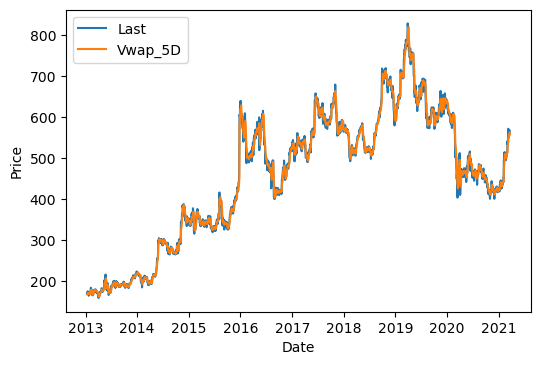

In [12]:
xx = pd.to_datetime(df1['date'])
plt.figure(dpi=100, facecolor='w')
plt.plot(xx,df1['last'])
plt.plot(xx,df1['vwap_5D'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Last','Vwap_5D'])

In [13]:
df1['factor_vwap'].describe()

count    2000.000000
mean       -0.000537
std         0.020387
min        -0.179179
25%        -0.012840
50%        -0.001562
75%         0.010905
max         0.113059
Name: factor_vwap, dtype: float64

Text(0.5, 0, 'factor')

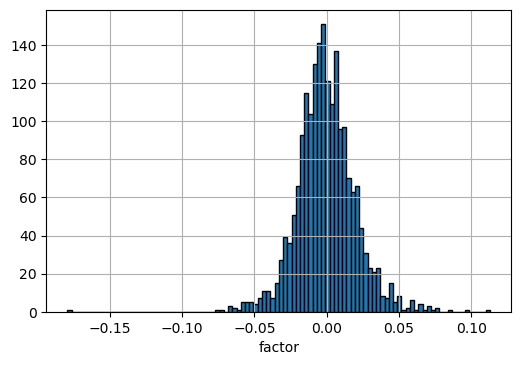

In [14]:
plt.figure(dpi=100, facecolor='w')
plt.hist(df1['factor_vwap'],edgecolor='k',bins=100)
plt.grid('on')
plt.xlabel('factor')

In [15]:
df1['factor_return5D'].describe()

count    2000.000000
mean        0.004211
std         0.049113
min        -0.182682
25%        -0.021409
50%         0.002878
75%         0.027357
max         0.438819
Name: factor_return5D, dtype: float64

Text(0.5, 0, 'factor')

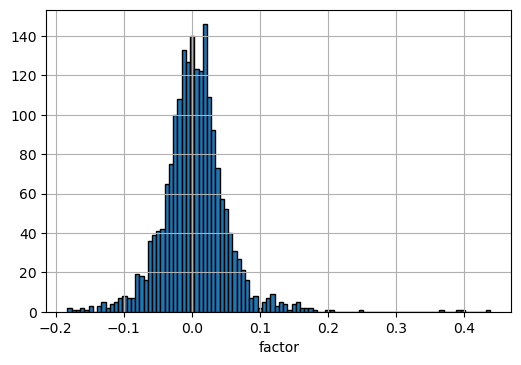

In [16]:
plt.figure(dpi=100, facecolor='w')
plt.hist(df1['factor_return5D'],edgecolor='k',bins=100)
plt.grid('on')
plt.xlabel('factor')

## Cross-sectional analysis

### factor_vwap

Text(0.5, 0, 'factor')

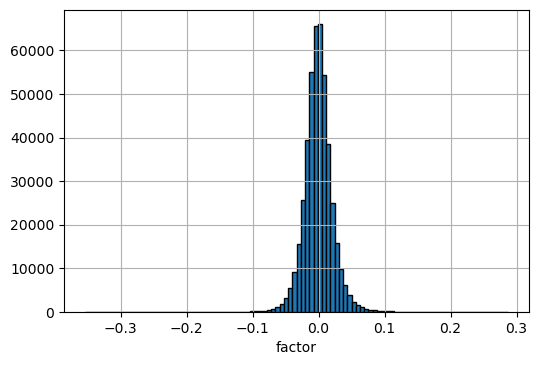

In [17]:
plt.figure(dpi=100, facecolor='w')
plt.hist(df_data['factor_vwap'],edgecolor='k',bins=100)
plt.grid('on')
plt.xlabel('factor')

In [18]:
n_stocks=df_data['ticker'].nunique()//10
n_stocks

24

In [19]:
dfsort = df_data.sort_values(['date', 'factor_vwap'])
dfsort.head(n_stocks)

,ticker,date,last,volume,pd_date,year,label,value,cum_value,cum_volume,vwap_5D,factor_vwap,factor_return5D
289964,7261 JT,2013-01-11,884.5865,35409800,2013-01-11,2013,0.046154,3.132303e+10,1.150956e+11,141222400.0,814.995696,-0.085388,0.102703
243371,6753 JT,2013-01-11,3186.9445,16929200,2013-01-11,2013,0.126280,5.395242e+10,1.058086e+11,35458800.0,2983.988344,-0.068015,0.118644
268704,7003 JT,2013-01-11,1362.7813,1554500,2013-01-11,2013,0.065217,2.118444e+09,5.741298e+09,4463000.0,1286.421344,-0.059358,0.065217
376396,8766 JT,2013-01-11,2067.3219,4963200,2013-01-11,2013,0.040666,1.026053e+10,3.469834e+10,17705300.0,1959.771624,-0.054879,0.082595
252844,6841 JT,2013-01-11,916.9868,3664400,2013-01-11,2013,0.066872,3.360206e+09,7.193629e+09,8247300.0,872.240546,-0.051300,0.087002
55153,3103 JT,2013-01-11,550.0000,1354900,2013-01-11,2013,0.037736,7.451950e+08,2.634519e+09,5031500.0,523.605088,-0.050410,0.145833
370538,8725 JT,2013-01-11,1438.4675,2660300,2013-01-11,2013,0.036935,3.826755e+09,1.711777e+10,12498500.0,1369.586132,-0.050294,0.057336
301119,7733 JT,2013-01-11,435.7474,13566000,2013-01-11,2013,0.044109,5.911349e+09,1.956628e+10,47099600.0,415.423580,-0.048923,0.077246
79134,4004 JT,2013-01-11,1187.0616,1772000,2013-01-11,2013,0.028571,2.103473e+09,9.488702e+09,8384000.0,1131.763124,-0.048860,0.066667
374391,8750 JT,2013-01-11,1079.7536,7415600,2013-01-11,2013,0.024903,8.007021e+09,3.681319e+10,35734400.0,1030.189192,-0.048112,0.028103


In [20]:
def calc_portfolio_returns(group):
    return group.head(n_stocks).mean()-group.tail(n_stocks).mean()

PnL = dfsort.groupby('date')['last'].apply(calc_portfolio_returns)

Text(0, 0.5, 'PnL')

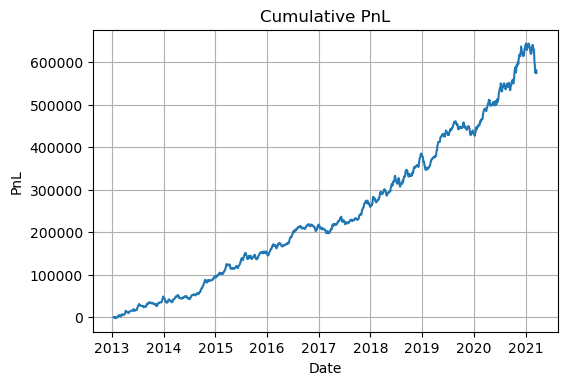

In [21]:
plt.figure(dpi=100,facecolor='w')
plt.plot(pd.to_datetime(PnL.index), PnL.cumsum().values)
plt.title('Cumulative PnL')
plt.grid('on')
plt.xlabel('Date')
plt.ylabel('PnL')

In [22]:
totalPnL=PnL.cumsum()
df_PnL=totalPnL.to_frame().reset_index()
df_PnL = df_PnL.rename(columns={'last': 'CumPnL'})
df_PnL['pd_date']=pd.to_datetime(df_PnL['date'])
df_PnL['year']=df_PnL['pd_date'].dt.year
df_PnL

,date,CumPnL,pd_date,year
0,2013-01-11,-463.465988,2013-01-11,2013
1,2013-01-15,-880.035767,2013-01-15,2013
2,2013-01-16,-1256.602692,2013-01-16,2013
3,2013-01-17,-745.042592,2013-01-17,2013
4,2013-01-18,-253.419312,2013-01-18,2013
...,...,...,...,...
1995,2021-03-15,576637.140733,2021-03-15,2021
1996,2021-03-16,577639.832400,2021-03-16,2021
1997,2021-03-17,579550.486567,2021-03-17,2021
1998,2021-03-18,581325.778233,2021-03-18,2021


In [23]:
daily_returns = totalPnL.pct_change(1)
mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

days=len(totalPnL)
annualized_returns = mean_daily_returns * days
annualized_volatility = std_daily_returns * np.sqrt(days)

sharpe_ratio = annualized_returns / annualized_volatility
sharpe_ratio

2.0941541484781827

### factor_return5D

Text(0.5, 0, 'factor')

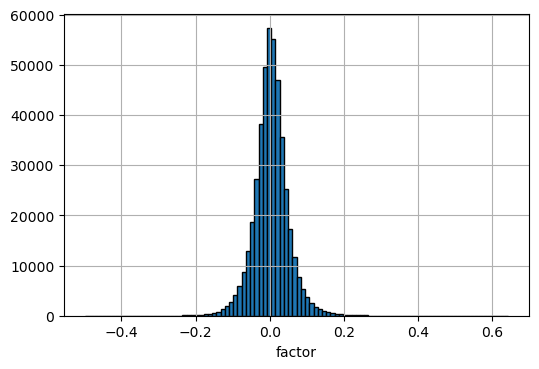

In [24]:
plt.figure(dpi=100, facecolor='w')
plt.hist(df_data['factor_return5D'],edgecolor='k',bins=100)
plt.grid('on')
plt.xlabel('factor')

In [25]:
n_stocks=df_data['ticker'].nunique()//10
n_stocks

24

In [26]:
dfsort = df_data.sort_values(['date', 'factor_return5D'])
dfsort.head(n_stocks)

,ticker,date,last,volume,pd_date,year,label,value,cum_value,cum_volume,vwap_5D,factor_vwap,factor_return5D
303124,7735 JT,2013-01-11,2185.4383,1299000,2013-01-11,2013,0.006383,2.838884e+09,1.494276e+10,6738200.0,2217.618529,0.014511,-0.107547
343525,8304 JT,2013-01-11,1664.7471,833600,2013-01-11,2013,-0.003922,1.387733e+09,1.196767e+10,7337100.0,1631.117235,-0.020618,-0.086331
341520,8303 JT,2013-01-11,1625.8715,2156400,2013-01-11,2013,-0.017341,3.506029e+09,2.476930e+10,14899100.0,1662.469726,0.022014,-0.086022
364366,8604 JT,2013-01-11,383.5505,81066900,2013-01-11,2013,-0.006085,3.109325e+10,1.997708e+11,517214600.0,386.243571,0.006972,-0.064886
236472,6702 JT,2013-01-11,3112.3208,1167500,2013-01-11,2013,0.000000,3.633635e+09,2.719362e+10,8759700.0,3104.401085,-0.002551,-0.064690
167384,5413 JT,2013-01-11,651.1255,352000,2013-01-11,2013,0.008333,2.291962e+08,1.418303e+09,2198700.0,645.064445,-0.009396,-0.064433
362361,8601 JT,2013-01-11,340.4674,18296000,2013-01-11,2013,-0.002150,6.229192e+09,3.260903e+10,95304000.0,342.158077,0.004941,-0.062626
387273,8830 JT,2013-01-11,2635.8294,5992000,2013-01-11,2013,-0.016203,1.579389e+10,6.046874e+10,22631000.0,2671.942692,0.013516,-0.061176
445103,9766 JT,2013-01-11,1621.6910,2636700,2013-01-11,2013,0.033599,4.275913e+09,1.974665e+10,12194900.0,1619.255179,-0.001504,-0.058121
260864,6954 JT,2013-01-11,13034.0354,2156900,2013-01-11,2013,-0.014502,2.811311e+10,8.933422e+10,6793000.0,13150.923337,0.008888,-0.055018


In [27]:
def calc_portfolio_returns(group):
    return group.tail(n_stocks).mean()-group.head(n_stocks).mean()

PnL = dfsort.groupby('date')['last'].apply(calc_portfolio_returns)

Text(0, 0.5, 'PnL')

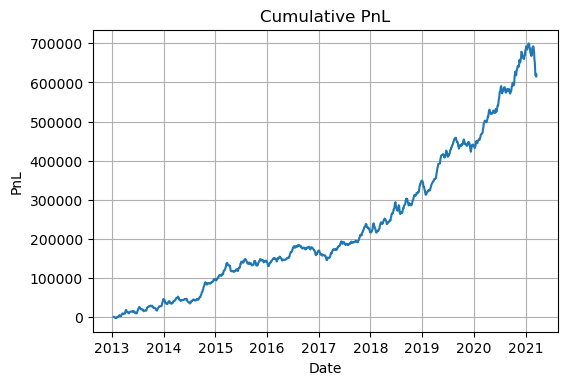

In [28]:
plt.figure(dpi=100,facecolor='w')
plt.plot(pd.to_datetime(PnL.index), PnL.cumsum().values)
plt.title('Cumulative PnL')
plt.grid('on')
plt.xlabel('Date')
plt.ylabel('PnL')

In [29]:
totalPnL=PnL.cumsum()
df_PnL=totalPnL.to_frame().reset_index()
df_PnL = df_PnL.rename(columns={'last': 'CumPnL'})
df_PnL['pd_date']=pd.to_datetime(df_PnL['date'])
df_PnL['year']=df_PnL['pd_date'].dt.year
df_PnL

,date,CumPnL,pd_date,year
0,2013-01-11,640.140992,2013-01-11,2013
1,2013-01-15,400.997767,2013-01-15,2013
2,2013-01-16,-22.563537,2013-01-16,2013
3,2013-01-17,-348.946550,2013-01-17,2013
4,2013-01-18,-691.152783,2013-01-18,2013
...,...,...,...,...
1995,2021-03-15,617983.654550,2021-03-15,2021
1996,2021-03-16,618696.958717,2021-03-16,2021
1997,2021-03-17,619574.008717,2021-03-17,2021
1998,2021-03-18,621484.067050,2021-03-18,2021


In [30]:
daily_returns = totalPnL.pct_change(1)
mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

days=len(totalPnL)
annualized_returns = mean_daily_returns * days
annualized_volatility = std_daily_returns * np.sqrt(days)

sharpe_ratio = annualized_returns / annualized_volatility
sharpe_ratio

1.4346684766345328

In [31]:
## Pearson Correlation of two alphas for all the companies
df2fac=df_data.loc[:,['factor_vwap','factor_return5D']].copy()
df2fac.corr()

,factor_vwap,factor_return5D
factor_vwap,1.00000,-0.77798
factor_return5D,-0.77798,1.00000


We don't need to normalize or neutralize the two alphas since all the alphas are in normal distribution within [0,1].

# Multialpha strategy

In [32]:
df_train = df_data[df_data['year'].isin([2013,2014,2015,2016,2017])].copy()
df_test=df_data[df_data['year'].isin([2018,2019,2020,2021])].copy()

## Linear model

In [33]:
import statsmodels.api as sm

In [34]:
X0 = df_train[['factor_vwap', 'factor_return5D']]
X0 = sm.add_constant(X0)
yy = df_train['label']

model = sm.OLS(yy, X0)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                 1.801e+05
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:57:53   Log-Likelihood:             7.8615e+05
No. Observations:              274418   AIC:                        -1.572e+06
Df Residuals:                  274415   BIC:                        -1.572e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002   2.64e-05     

In [35]:
X_test=df_test[['factor_vwap', 'factor_return5D']]
X_test = sm.add_constant(X_test)
df_test['predict'] = results.predict(X_test)

In [36]:
df_test[['predict','label']].corr()

,predict,label
predict,1.000000,0.759951
label,0.759951,1.000000


In [37]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(df_test['label'], df_test['predict']))
print("RMSE:",np.sqrt(metrics.mean_squared_error(df_test['label'], df_test['predict'])))

MSE: 0.0001864602457614916
RMSE: 0.013655044700091303


In [38]:
## backtest

In [39]:
dfsort = df_test.sort_values(['date', 'predict'])

In [40]:
def calc_portfolio_returns(group):
    return group.tail(n_stocks).mean()-group.head(n_stocks).mean()

PnL = dfsort.groupby('date')['last'].apply(calc_portfolio_returns)

Text(0, 0.5, 'PnL')

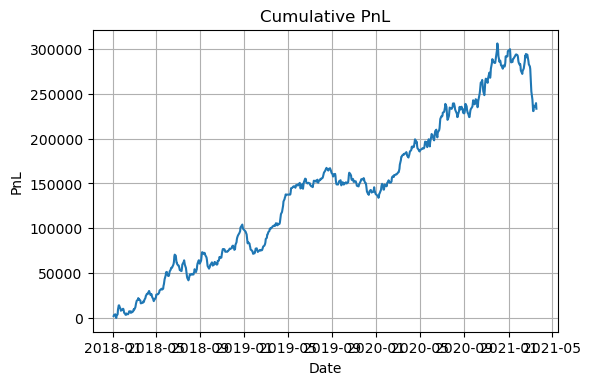

In [41]:
plt.figure(dpi=100,facecolor='w')
plt.plot(pd.to_datetime(PnL.index), PnL.cumsum().values)
plt.title('Cumulative PnL')
plt.grid('on')
plt.xlabel('Date')
plt.ylabel('PnL')

In [42]:
totalPnL=PnL.cumsum()
df_PnL=totalPnL.to_frame().reset_index()
df_PnL = df_PnL.rename(columns={'last': 'CumPnL'})
df_PnL['pd_date']=pd.to_datetime(df_PnL['date'])
df_PnL['year']=df_PnL['pd_date'].dt.year
df_PnL

,date,CumPnL,pd_date,year
0,2018-01-04,1940.986013,2018-01-04,2018
1,2018-01-05,3196.560529,2018-01-05,2018
2,2018-01-09,3870.317104,2018-01-09,2018
3,2018-01-10,2035.707183,2018-01-10,2018
4,2018-01-11,-252.995392,2018-01-11,2018
...,...,...,...,...
775,2021-03-15,235952.033888,2021-03-15,2021
776,2021-03-16,236443.117221,2021-03-16,2021
777,2021-03-17,237971.875554,2021-03-17,2021
778,2021-03-18,239692.021388,2021-03-18,2021


In [43]:
daily_returns = totalPnL.pct_change(1)
mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

days=len(totalPnL)
annualized_returns = mean_daily_returns * days
annualized_volatility = std_daily_returns * np.sqrt(days)

sharpe_ratio = annualized_returns / annualized_volatility
sharpe_ratio

-0.3162307885612105

## Tree model

In [44]:
X0 = df_train[['factor_vwap', 'factor_return5D']]
yy = df_train['label']

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0,verbose=1)
model.fit(X0, yy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestRegressor(random_state=0, verbose=1)

In [46]:
### Training data evaluation

In [47]:
df_train['predict_randomForest'] = model.predict(df_train[['factor_vwap', 'factor_return5D']])
df_train[['predict_randomForest','label']].corr()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.7s finished


,predict_randomForest,label
predict_randomForest,1.000000,0.969943
label,0.969943,1.000000


In [48]:
print("MSE:",metrics.mean_squared_error(df_train['label'], df_train['predict_randomForest']))
print("RMSE:",np.sqrt(metrics.mean_squared_error(df_train['label'], df_train['predict_randomForest'])))

MSE: 3.0214690738376933e-05
RMSE: 0.00549678912988091


In [49]:
### Test data evaluation

In [50]:
df_test['predict_randomForest'] = model.predict(df_test[['factor_vwap', 'factor_return5D']])
df_test[['predict_randomForest','label']].corr()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.3s finished


,predict_randomForest,label
predict_randomForest,1.000000,0.718118
label,0.718118,1.000000


In [51]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(df_test['label'], df_test['predict_randomForest']))
print("RMSE:",np.sqrt(metrics.mean_squared_error(df_test['label'], df_test['predict_randomForest'])))

MSE: 0.00022159553692414267
RMSE: 0.01488608534585714


In [52]:
## backtest

In [53]:
dfsort = df_test.sort_values(['date', 'predict_randomForest'])

In [54]:
def calc_portfolio_returns(group):
    return group.tail(n_stocks).mean()-group.head(n_stocks).mean()

PnL = dfsort.groupby('date')['last'].apply(calc_portfolio_returns)

Text(0, 0.5, 'PnL')

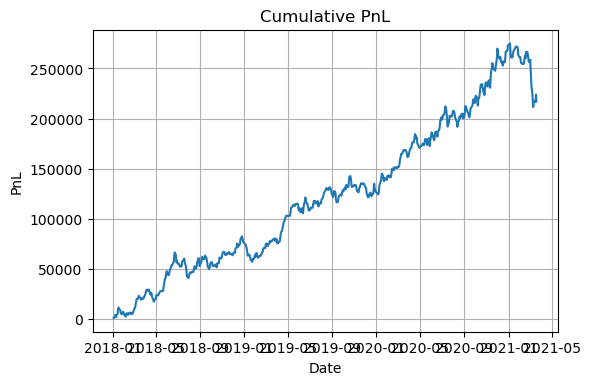

In [55]:
plt.figure(dpi=100,facecolor='w')
plt.plot(pd.to_datetime(PnL.index), PnL.cumsum().values)
plt.title('Cumulative PnL')
plt.grid('on')
plt.xlabel('Date')
plt.ylabel('PnL')

In [56]:
totalPnL=PnL.cumsum()
df_PnL=totalPnL.to_frame().reset_index()
df_PnL = df_PnL.rename(columns={'last': 'CumPnL'})
df_PnL['pd_date']=pd.to_datetime(df_PnL['date'])
df_PnL['year']=df_PnL['pd_date'].dt.year
df_PnL

,date,CumPnL,pd_date,year
0,2018-01-04,884.220717,2018-01-04,2018
1,2018-01-05,1018.882117,2018-01-05,2018
2,2018-01-09,4015.557329,2018-01-09,2018
3,2018-01-10,2976.258254,2018-01-10,2018
4,2018-01-11,1887.591337,2018-01-11,2018
...,...,...,...,...
775,2021-03-15,216573.703125,2021-03-15,2021
776,2021-03-16,217161.415625,2021-03-16,2021
777,2021-03-17,218179.298958,2021-03-17,2021
778,2021-03-18,223923.003125,2021-03-18,2021


In [57]:
daily_returns = totalPnL.pct_change(1)
mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

days=len(totalPnL)
annualized_returns = mean_daily_returns * days
annualized_volatility = std_daily_returns * np.sqrt(days)

sharpe_ratio = annualized_returns / annualized_volatility
sharpe_ratio

2.4451603156527795

Overall, based on the annulized sharpe ratio, the tree model is the best, but further testing is necessary for evaluation.